In [26]:
from datatops import Datatops
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass

In [3]:
dt = Datatops(url='https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab')
proj = dt.get_project("dancegenre", admin_key=getpass.getpass("a-d70616f6-47f9-4ae0-a997-5cabb5affd37"))
data = proj.list_data()
n = len(data)
print("Number of responses so far: ", n)

a-d70616f6-47f9-4ae0-a997-5cabb5affd37 ······································


Number of responses so far:  69


In [4]:
guesses = [g for d in data for g in d['results']['guess']]
truth = [g for d in data for g in d['results']['truth']]
df = pd.DataFrame({"guess": guesses, "truth": truth})

# Confusion matrix:
mat = pd.crosstab(df['truth'], df['guess'], rownames=['truth'], colnames=['guess'])

In [22]:
genres = sorted(df['truth'].unique())
print(genres)


['Ballet Jazz', 'Break', 'House', 'Krump', 'LA style Hip-hop', 'Lock', 'Middle Hip-hop', 'Pop', 'Street Jazz', 'Waack']


trial index 1 = have you done this before
trial index 2 = are you a dancer
trial index 3 = are you a hiphop dancer
trial index 4 = do you watch hip-hop dance

In [5]:
guesses = [g for d in data for g in d["results"]["guess"]]
truth = [g for d in data for g in d["results"]["truth"]]
accuracies = [d["results"]["accuracy"] for d in data]

# fmt:off
previous_runs = [[r['response']['Q0'] for r in d['responses'] if r['internal_node_id'] == '0.0-1.0'][0] for d in data] 
dancer_status = [[r['response']['Q0'] for r in d['responses'] if r['internal_node_id'] == '0.0-2.0'][0] for d in data]
hiphop_status = [[r['response']['Q0'] for r in d['responses'] if r['internal_node_id'] == '0.0-3.0'][0] for d in data]
watch_status = [[r['response']['Q0'] for r in d['responses'] if r['internal_node_id'] == '0.0-4.0'][0] for d in data]
subject_id = [d['responses'][0]['subject'] for d in data]
# fmt:on

# All but guesses/truth must be reduplicated to match the length of
# guesses/truth. i.e., previous_runs  should be previous_runs[i] * len(guesses)
# for each i in range(len(data))
previous_runs = [p for _ in range(16) for p in previous_runs]
dancer_status = [p for _ in range(16) for p in dancer_status]
hiphop_status = [p for _ in range(16) for p in hiphop_status]
watch_status = [p for _ in range(16) for p in watch_status]
subject_id = [p for _ in range(16) for p in subject_id]

df = pd.DataFrame(
    {
        "guess": guesses,
        "truth": truth,
        "previous_runs": previous_runs,
        "dancer_status": dancer_status,
        "hiphop_status": hiphop_status,
        "watch_status": watch_status,
        "subject_id": subject_id,
    }
)
df.previous_runs = df.previous_runs.astype(int)
df.dancer_status = df.dancer_status.astype(int)
df.hiphop_status = df.hiphop_status.astype(int)
df.watch_status = df.watch_status.astype(int)



In [14]:
df.head()

,guess,truth,previous_runs,dancer_status,hiphop_status,watch_status,subject_id
0,Pop,Lock,0,2,1,2,qcj0spcl3cfttzw
1,Break,House,0,3,3,3,m06vb0yokz2wehx
2,Middle Hip-hop,Middle Hip-hop,0,3,1,3,gfkngtanw6qwpeu
3,LA style Hip-hop,LA style Hip-hop,0,3,1,2,jas146uq0d3mmc4
4,Krump,Krump,0,1,0,2,kl0ymas97f7b87l


In [7]:
dfi = df[df.previous_runs == 0].copy()

In [20]:
df_watcher = df[df.watch_status >= 2]
df_dancer = df[df.dancer_status >= 2]
df_hiphopdancer = df[df.hiphop_status >= 2]

In [10]:
#look at f1 score for each class
from sklearn.metrics import classification_report
print(classification_report(dfi.truth, dfi.guess))

                  precision    recall  f1-score   support

     Ballet Jazz       0.59      0.69      0.64        88
           Break       0.60      0.47      0.53       106
           House       0.39      0.38      0.38       107
           Krump       0.62      0.48      0.54       120
LA style Hip-hop       0.20      0.20      0.20       110
            Lock       0.33      0.30      0.31       103
  Middle Hip-hop       0.26      0.24      0.25       117
             Pop       0.32      0.37      0.34       101
     Street Jazz       0.27      0.36      0.31        96
           Waack       0.39      0.41      0.40        92

        accuracy                           0.39      1040
       macro avg       0.40      0.39      0.39      1040
    weighted avg       0.40      0.39      0.39      1040



In [18]:
#look at f1 score for each class
from sklearn.metrics import classification_report
print(classification_report(df_watcher.truth, df_watcher.guess))

                  precision    recall  f1-score   support

     Ballet Jazz       0.62      0.70      0.66        70
           Break       0.56      0.43      0.48        82
           House       0.32      0.32      0.32        78
           Krump       0.62      0.50      0.55       105
LA style Hip-hop       0.20      0.19      0.19        86
            Lock       0.39      0.33      0.36        85
  Middle Hip-hop       0.30      0.30      0.30        84
             Pop       0.27      0.31      0.29        71
     Street Jazz       0.26      0.35      0.30        75
           Waack       0.34      0.42      0.38        64

        accuracy                           0.38       800
       macro avg       0.39      0.38      0.38       800
    weighted avg       0.39      0.38      0.38       800



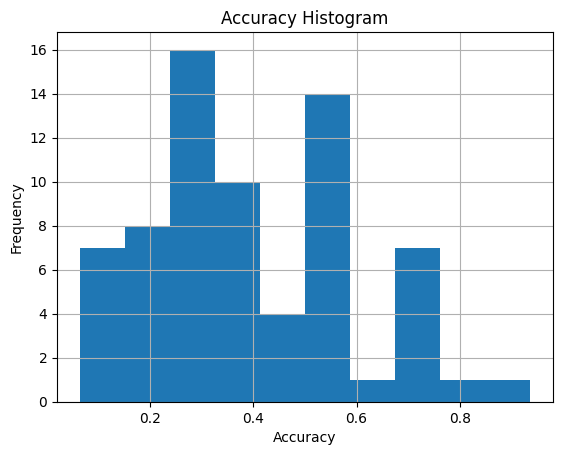

In [22]:
pd.Series(accuracies).astype(float).hist()
plt.title("Accuracy Histogram")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

In [16]:
#mean accuracy
pd.Series(accuracies).astype(float).mean()

0.3903985507246377

In [32]:
#average accuracy
pd.Series(accuracies).astype(float).mean()


0.3903985507246377

In [38]:
#accuracy where hip_hop_status >2 and watch_status >2
hhdf = df[(df.watch_status > 1)].copy()
#accuracy of this subset
hhdf[hhdf.guess == hhdf.truth].shape[0] / hhdf.shape[0]

0.38125

In [14]:
# find subject ids who were the most accurate
dfi[dfi.guess == dfi.truth].groupby("subject_id").count().sort_values("guess", ascending=False)

,guess,truth,previous_runs,dancer_status,hiphop_status,watch_status
subject_id,,,,,,
x0db1jcrreg16r0,12,12,12,12,12,12
1bzjyyjy0gx9oyn,10,10,10,10,10,10
2ngd1o4cxc3xkt3,9,9,9,9,9,9
lm1k07udpok3d0j,9,9,9,9,9,9
4dk0jphwg997s9m,9,9,9,9,9,9
...,...,...,...,...,...,...
2nrrzrgedpq97lq,4,4,4,4,4,4
k0k5fau93041drc,3,3,3,3,3,3
9bv5narr1r5fc8k,3,3,3,3,3,3


In [24]:
#look at only the n most accurate subjects
n=20
topguessers = dfi[dfi.guess == dfi.truth].groupby("subject_id").count().sort_values("guess", ascending=False).head(n).index
topguessers

Index(['x0db1jcrreg16r0', '1bzjyyjy0gx9oyn', '2ngd1o4cxc3xkt3',
       'lm1k07udpok3d0j', '4dk0jphwg997s9m', 'hda3fm9fj0z3ud2',
       'gfkngtanw6qwpeu', 'a6dztzxkubxn21w', 'pw36o5ar9omtr24',
       'mm31f2yqw6xfvl2', 't7cvgrj11uq2w6x', 'jkadnk57fpcz0sw',
       'fz7atocl9ybmn9b', 'f7mkzckm5jg9ktf', 'q955zt2pppm5xv5',
       'yn2jmhk45bbyzu9', '99wv1k392rp4pdv', 'd2616surfu66csn',
       'z1xs3sx6kfmv4tc', 'jcotppwx9g8crk2'],
      dtype='object', name='subject_id')

In [25]:
#make df for subjects who were in top 20
dftop = df[df.subject_id.isin(topguessers)].copy()
dftop.head()

,guess,truth,previous_runs,dancer_status,hiphop_status,watch_status,subject_id
2,Middle Hip-hop,Middle Hip-hop,0,3,1,3,gfkngtanw6qwpeu
5,Middle Hip-hop,Middle Hip-hop,0,3,3,1,99wv1k392rp4pdv
8,House,Middle Hip-hop,0,0,0,1,yn2jmhk45bbyzu9
11,Pop,Pop,0,0,0,2,2ngd1o4cxc3xkt3
15,Waack,Lock,0,1,0,1,x0db1jcrreg16r0


In [26]:
#check the accuracy of dftop subjects
dftop[dftop.guess == dftop.truth].shape[0] / dftop.shape[0]

0.5208333333333334

In [30]:
mat_top = pd.crosstab(dftop['truth'], dftop['guess'], rownames=['truth'], colnames=['guess'])
mat_watcher = pd.crosstab(df_watcher['truth'], df_watcher['guess'], rownames=['truth'], colnames=['guess'])
mat_dancer = pd.crosstab(df_dancer['truth'], df_dancer['guess'], rownames=['truth'], colnames=['guess'])

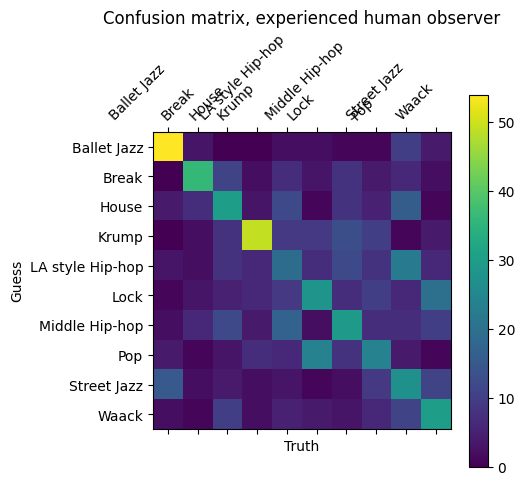

In [24]:
mat_watch = pd.crosstab(
    df[df["dancer_status"] > 1]["truth"],
    df[df["dancer_status"] > 1]["guess"],
    rownames=["truth"],
    colnames=["guess"],)

plt.matshow(mat_watch)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=genres, rotation=45, ha='right')
#make xticks on the bottom
plt.yticks(range(len(mat_watch.index)), mat_watch.index)
plt.xlabel('Truth')
plt.ylabel('Guess')
plt.title('Confusion matrix, experienced human observer')
plt.colorbar()
#plt.savefig('../MovementClassifier/DanceProj1/plots/HumanExpObserver.png', dpi=300)
plt.show()

/tmp/ipykernel_177/1180817631.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mat_watch_normalized = mat_watch.astype('float') / mat_watch.sum(axis=1)[:, np.newaxis]


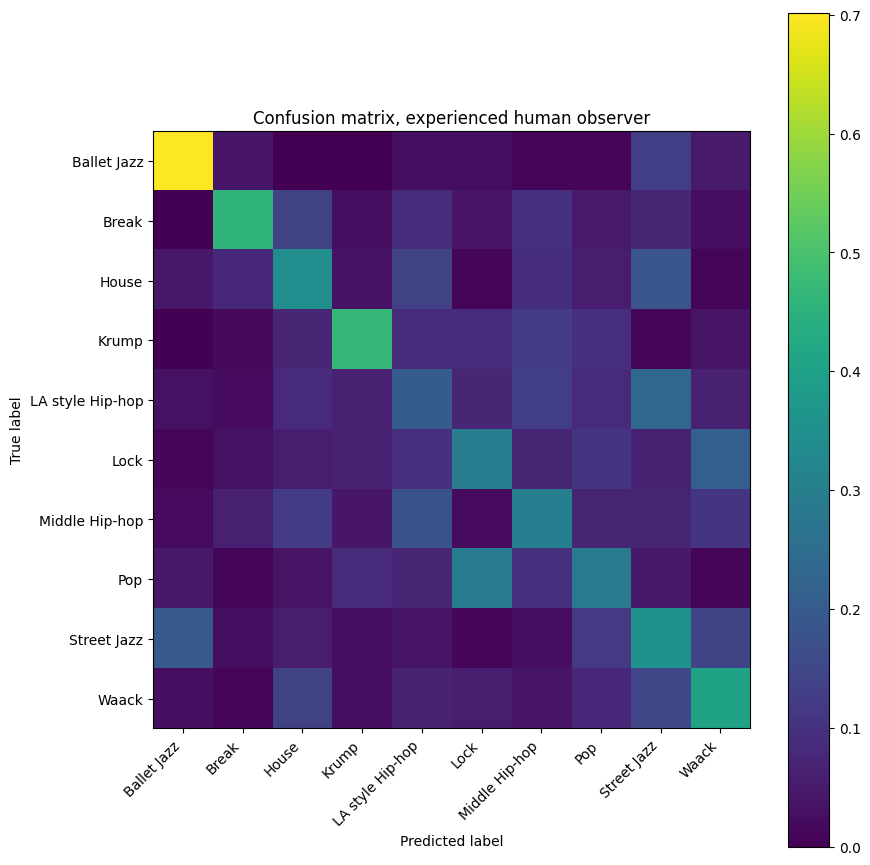

In [27]:
# Normalize confusion matrix
mat_watch_normalized = mat_watch.astype('float') / mat_watch.sum(axis=1)[:, np.newaxis]

# Create plot
plt.figure(figsize=(9,9))
plt.imshow(mat_watch_normalized, interpolation='nearest', cmap='viridis')
plt.title('Confusion matrix, experienced human observer')
plt.colorbar()

# Add tick marks, labels, and axes labels
tick_marks = np.arange(len(mat_watch.columns))
plt.xticks(tick_marks, mat_watch.columns, rotation=45, ha='right')
plt.yticks(tick_marks, mat_watch.index)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


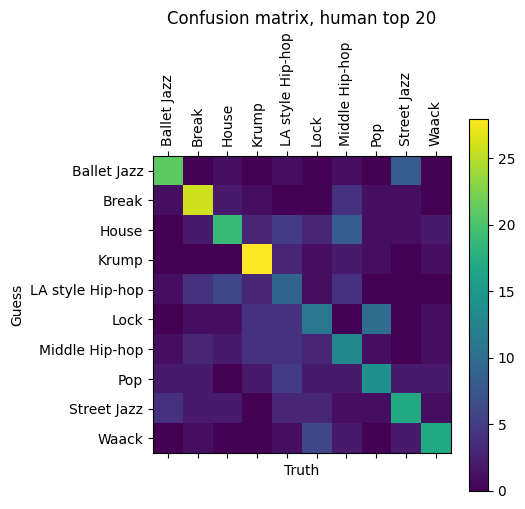

In [31]:

plt.matshow(mat_top.T)
plt.xticks(range(len(mat.columns)), mat.columns, rotation=90)
#make xticks on the bottom
plt.yticks(range(len(mat.index)), mat.index)
#plt.title('Confusion matrix, human, n=69')
plt.xlabel('Truth')
plt.ylabel('Guess')
plt.title('Confusion matrix, human top 20')
plt.colorbar()
#plt.savefig('../MovementClassifier/DanceProj1/plots/humantop25confusion.png', dpi=300)
plt.show()

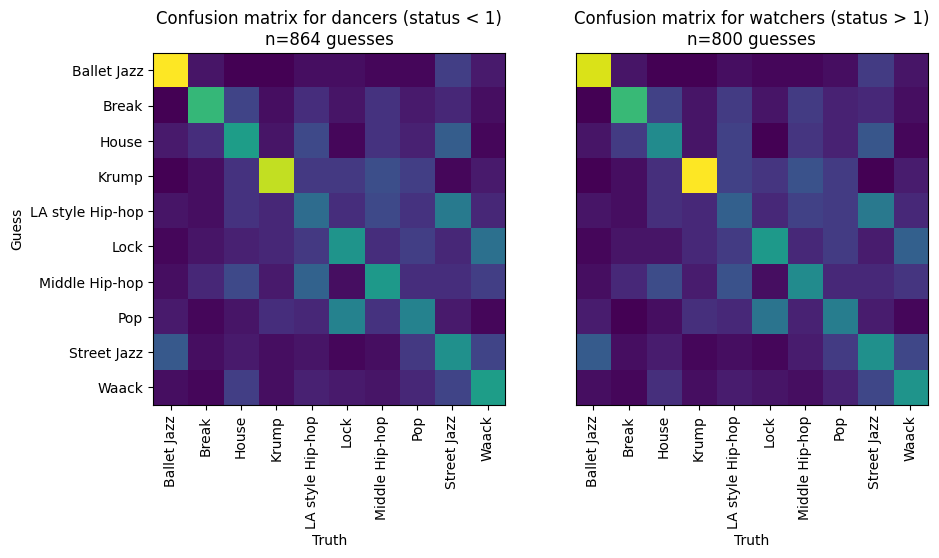

In [34]:
# Confusion matrix for those who are watchers and dancers:
plt.subplots(1, 2, figsize=(10, 5))
plt.subplot(1, 2, 1)
mat = pd.crosstab(
    df[df["dancer_status"] > 1]["truth"],
    df[df["dancer_status"] > 1]["guess"],
    rownames=["truth"],
    colnames=["guess"],
)
plt.imshow(mat)
plt.title(
    f"Confusion matrix for dancers (status < 1)\nn={len(df[df['dancer_status'] > 1])} guesses"
)
plt.xticks(range(len(mat.columns)), mat.columns, rotation=90)
plt.yticks(range(len(mat.index)), mat.index)
plt.xlabel("Truth")
plt.ylabel("Guess")

plt.subplot(1, 2, 2)
mat = pd.crosstab(
    df[df["watch_status"] > 1]["truth"],
    df[df["watch_status"] > 1]["guess"],
    rownames=["truth"],
    colnames=["guess"],
)
plt.imshow(mat)
plt.title(
    f'Confusion matrix for watchers (status > 1)\nn={len(df[df["watch_status"] > 1])} guesses'
)
plt.xticks(range(len(mat.columns)), mat.columns, rotation=90)
plt.yticks([], [])
plt.xlabel("Truth")
# plt.ylabel('Guess')
# plt.colorbar()
plt.show()

One interpretation: dancers are seeing break-uprock as house (somewhat rightly so)